Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None

Missing Values per Column:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          

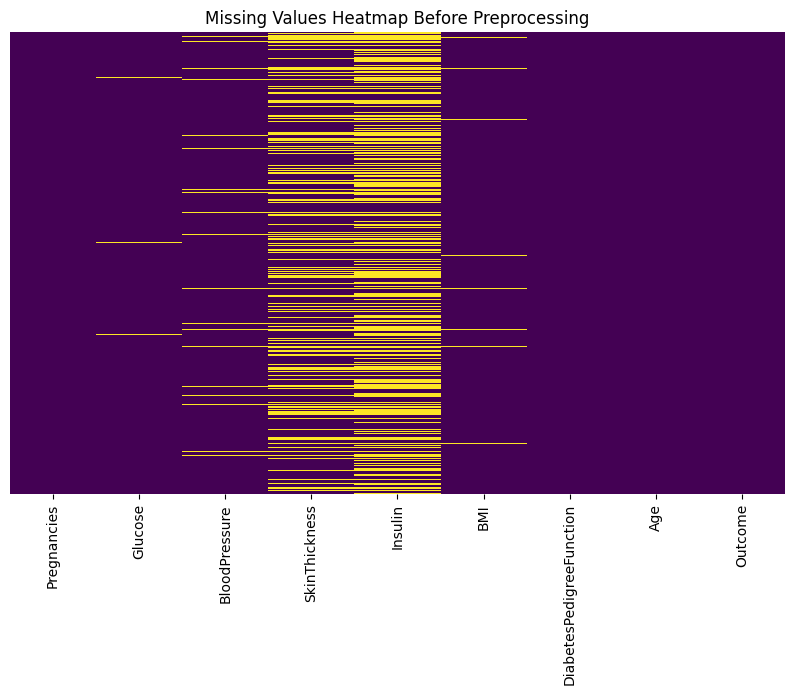

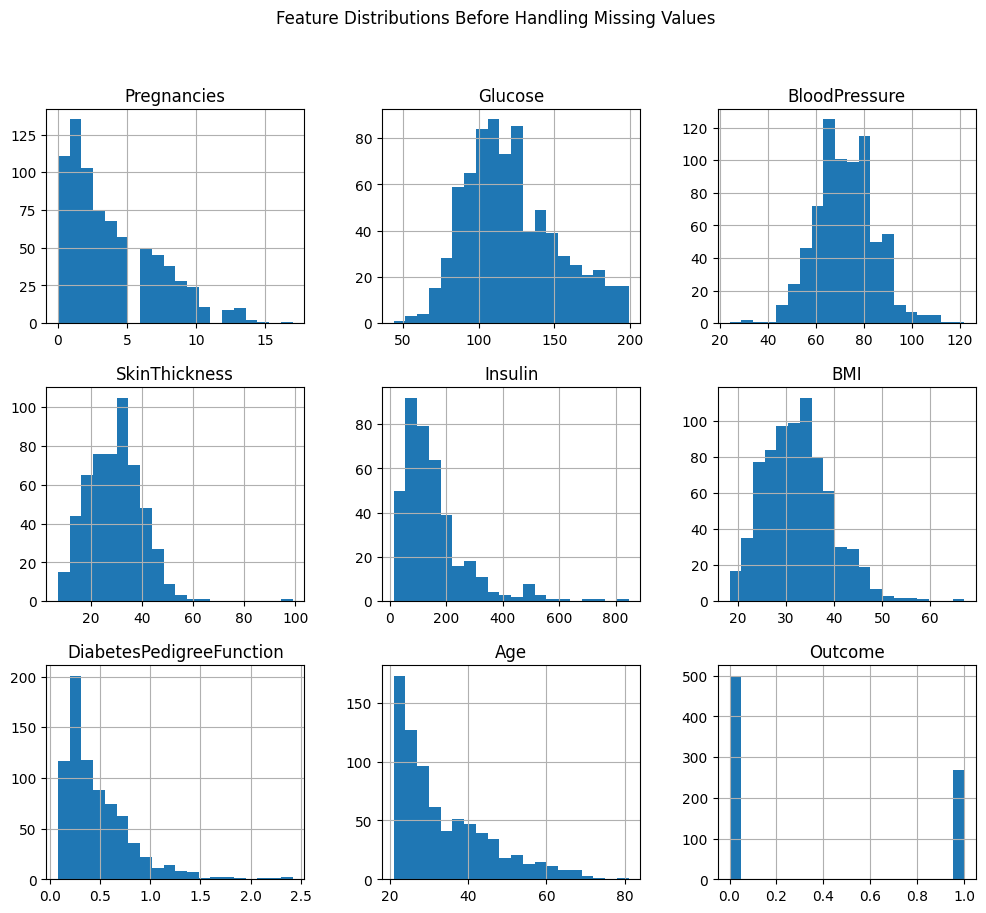


Missing Values After Preprocessing:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Updated: Missing values handled correctly & dataset saved.
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3           

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset
file_path = "/content/dataset_KNN.csv"
df = pd.read_csv(file_path)

# Step 1: Understanding the Dataset
print("Dataset Overview:")
print(df.info())  # Check for missing values and data types

# Step 2: Check for Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)

# Step 3: Visualizing Missing Data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap Before Preprocessing")
plt.show()

# Step 4: Handling Missing Values (Understanding Data Distribution First)
# Using histograms to inspect the distribution of numeric variables
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions Before Handling Missing Values")
plt.show()

# step 5: Fill Missing Values using Median
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

# Step 6: Verify Missing Values After Handling
print("\nMissing Values After Preprocessing:")
print(df.isnull().sum())


# Save the cleaned dataset again
preprocessed_file_path = "/content/dataset_cleaned_KNN.csv"

df.to_csv("/content/dataset_cleaned_KNN.csv", index=False)
df_preprocessed = pd.read_csv(preprocessed_file_path)
print("Updated: Missing values handled correctly & dataset saved.")

print(df_preprocessed.head())

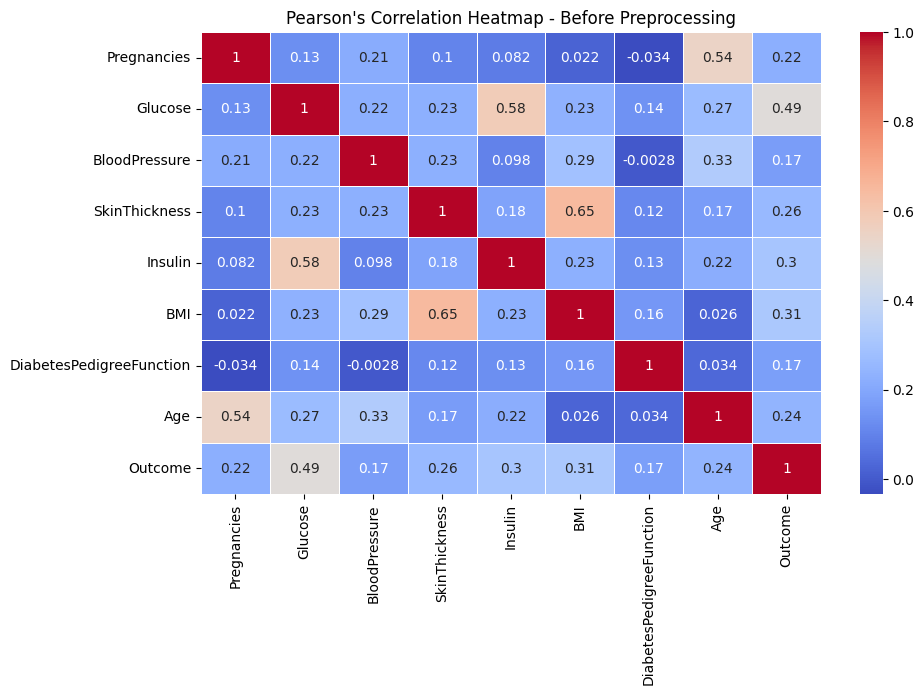

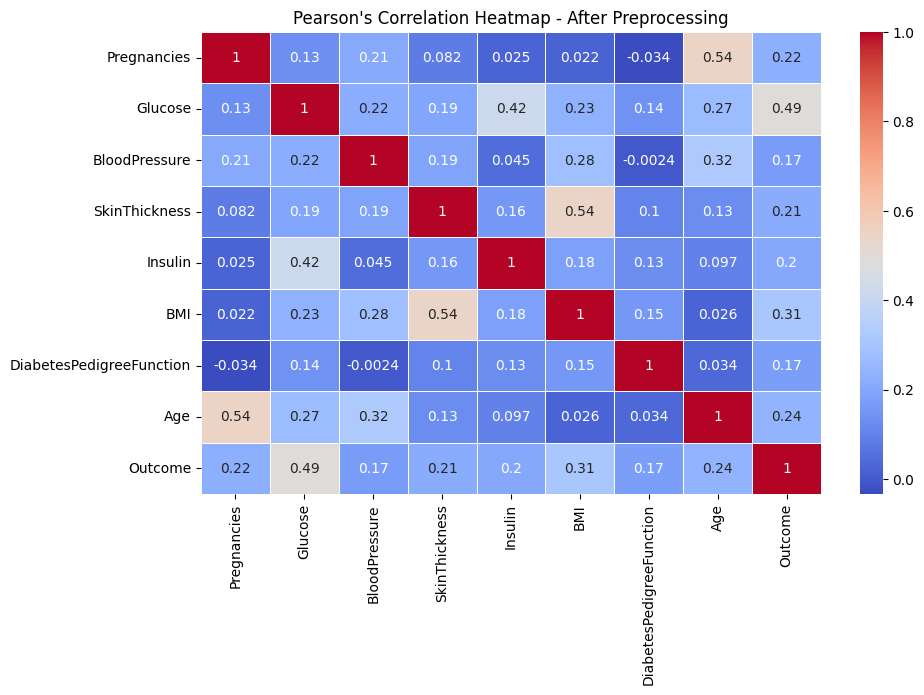

In [ ]:

# Reload the original dataset before preprocessing
file_path_original = "/content/dataset_KNN.csv"
df_original = pd.read_csv(file_path_original)

# Plot Heatmap Before Preprocessing
plt.figure(figsize=(10, 6))
sns.heatmap(df_original.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Pearson's Correlation Heatmap - Before Preprocessing")
plt.show()

# Reload the cleaned dataset after preprocessing
file_path_cleaned = "/content/dataset_cleaned_KNN.csv"
df_cleaned = pd.read_csv(file_path_cleaned)

# Plot Heatmap After Preprocessing
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Pearson's Correlation Heatmap - After Preprocessing")
plt.show()


In [ ]:
# Data Scaling (Standardization for KNN)
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
df_cleaned = pd.read_csv("/content/dataset_cleaned_KNN.csv")

# Define Features (X) and Target (y)
X = df_cleaned.drop(columns=["Outcome"])  # Features (all columns except the target variable)
y = df_cleaned["Outcome"]  # Target variable (0 or 1)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and Transform the Data
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for better readability
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Save the Scaled Dataset
scaled_file_path = "/content/dataset_scaled_KNN.csv"
scaled_df["Outcome"] = y  # Add back the target variable
scaled_df.to_csv(scaled_file_path, index=False)

print(f"Scaled dataset saved at: {scaled_file_path}")
print("Scaled Dataset Sample:\n", scaled_df.head())


Scaled dataset saved at: /content/dataset_scaled_KNN.csv
Scaled Dataset Sample:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Load the scaled dataset
scaled_file_path = "/content/dataset_scaled_KNN.csv"
df_scaled = pd.read_csv(scaled_file_path)

# Define Features (X) and Target (y)
X = df_scaled.drop(columns=["Outcome"])
y = df_scaled["Outcome"]  # Target variables

# Split the dataset into Training (75%) and Testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Fold Cross-Validation for KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

# Print Results
print(f"Data Splitting Completed: Training Size: {len(X_train)}, Testing Size: {len(X_test)}")
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.3f}")


Data Splitting Completed: Training Size: 576, Testing Size: 192
Cross-Validation Accuracy Scores: [0.75862069 0.74782609 0.73043478 0.74782609 0.79130435]
Mean CV Accuracy: 0.755


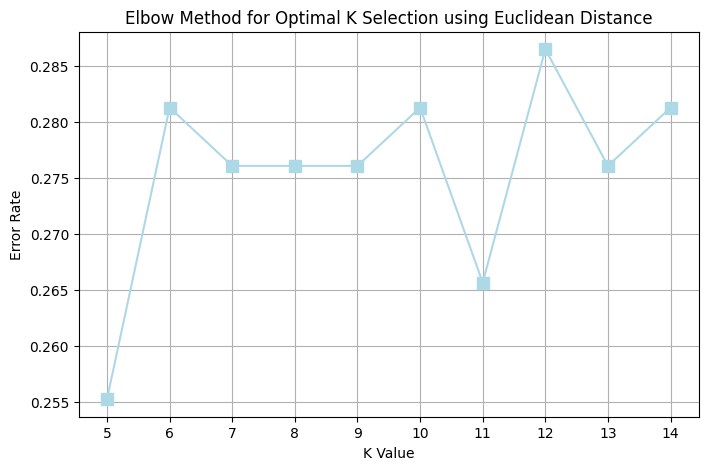

Best K value found using Elbow Method: 5


In [ ]:
# Finding the Best K using the Elbow Method with Euclidean Distance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Reload the scaled dataset
scaled_file_path = "/content/dataset_scaled_KNN.csv"
df_scaled = pd.read_csv(scaled_file_path)

# Define Features (X) and Target (y)
X = df_scaled.drop(columns=["Outcome"])  # Features
y = df_scaled["Outcome"]  # Target variable (0 or 1)

# Split the dataset into Training (75%) and Testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Define a range of K values to test
k_values = range(5, 15)
error_rates = []

# Iterate through different K values to find the best one
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  # Use Euclidean Distance
    knn.fit(X_train, y_train)  # Train KNN model
    y_pred_k = knn.predict(X_test)  # Predict on test set
    error = 1 - accuracy_score(y_test, y_pred_k)  # Calculate error rate
    error_rates.append(error)

# Plot the Elbow Method Graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, error_rates, marker='s', linestyle='-', color='lightblue', markersize=8)
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Elbow Method for Optimal K Selection using Euclidean Distance")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the best K (the one with the lowest error rate)
best_k = k_values[np.argmin(error_rates)]
print(f"Best K value found using Elbow Method: {best_k}")


Top 3 Most Important Features for KNN Classification:
   Feature  Importance
1  Glucose    0.237416
5      BMI    0.142140
7      Age    0.138394


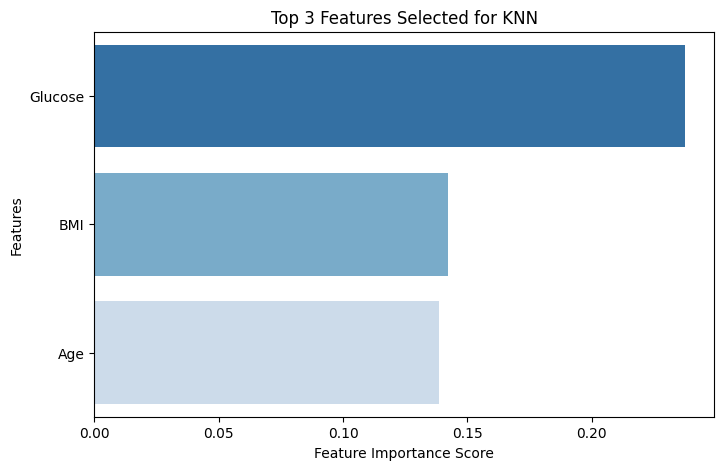

In [ ]:
# Step 7: Selecting the Three Best Attributes for KNN
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier

# Load the scaled dataset
scaled_file_path = "/content/dataset_scaled_KNN.csv"
df_scaled = pd.read_csv(scaled_file_path)

# Define Features (X) and Target (y)
X = df_scaled.drop(columns=["Outcome"])  # Features
y = df_scaled["Outcome"]  # Target variable (0 or 1)

# Feature Importance using ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance scores
feature_importance = model.feature_importances_

# Convert to DataFrame
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Select the top 3 features
top_3_features = feature_importance_df.head(3)

# Print results
print("Top 3 Most Important Features for KNN Classification:")
print(top_3_features)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=top_3_features, hue="Feature", dodge=False, legend=False, palette="Blues_r")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 3 Features Selected for KNN")
plt.show()


The top three features were selected based on their importance scores from the model. These features have the strongest influence on predicting diabetes:

1️. Glucose – High blood sugar levels are a major indicator of diabetes.

2️. BMI (Body Mass Index) – Obesity and overweight individuals have a higher risk of diabetes.

3️. Age – Older individuals are more likely to develop diabetes due to metabolic changes.

These features were chosen because they show the highest correlation with the outcome and are biologically relevant to diabetes prediction.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define three different K values to test
k_values_to_test = [best_k - 2, best_k, best_k + 2]  # Best K found from Elbow Method ±2

# Dictionary to store results
knn_results = {}

# Iterate through the selected K values
for k in k_values_to_test:
# Initialize KNN Classifier with Euclidean distance
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")

# Train the model
    knn.fit(X_train, y_train)

# Predict on the test set
    y_pred = knn.predict(X_test)

# Calculate Accuracy
    accuracy = accuracy_score(y_test, y_pred)

# Store the results
    knn_results[k] = {
        "Accuracy": accuracy,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }

# Print the results for each K value
    print(f"Results for K = {k}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(knn_results[k]["Confusion Matrix"])
    print("Classification Report:")
    print(knn_results[k]["Classification Report"])
    print("-" * 50)  # Separator for readability

# Display Summary of Results
print("\n Summary of KNN Performance with Different K Values:")
for k, result in knn_results.items():
    print(f"K = {k} → Accuracy: {result['Accuracy']:.4f}")

Results for K = 3:
Accuracy: 0.7240
Confusion Matrix:
[[101  24]
 [ 29  38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       125
           1       0.61      0.57      0.59        67

    accuracy                           0.72       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.72      0.72      0.72       192

--------------------------------------------------
Results for K = 5:
Accuracy: 0.7448
Confusion Matrix:
[[105  20]
 [ 29  38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       125
           1       0.66      0.57      0.61        67

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.74      0.74       192

--------------------------------------------------
Results for K = 7:
Accuracy: 0.7240
Confusio

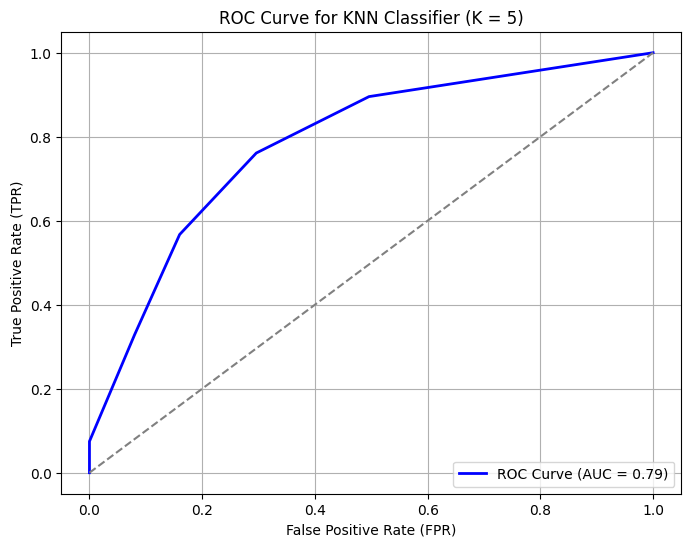

AUC Score for Best K (5): 0.7856


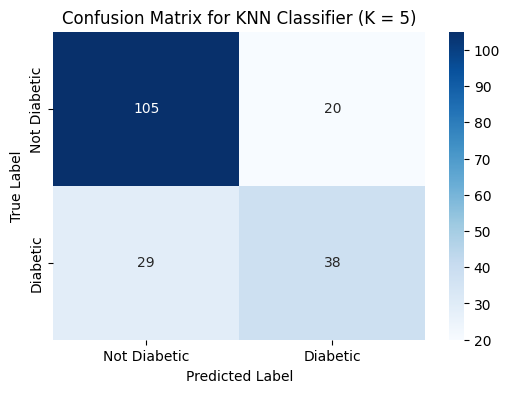

Confusion Matrix for Best K (5):
 [[105  20]
 [ 29  38]]


In [ ]:
# Plot the ROC Curve for the Best K Value
from sklearn.metrics import roc_curve, auc

# Initialize the KNN classifier with the best K value
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")

# Train the classifier
knn_best.fit(X_train, y_train)

# Predict probabilities for ROC Curve
y_probs = knn_best.predict_proba(X_test)[:, 1]  # Get probability scores for the positive class

# Compute ROC Curve values
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title(f"ROC Curve for KNN Classifier (K = {best_k})")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print the AUC score
print(f"AUC Score for Best K ({best_k}): {roc_auc:.4f}")

# Plot Confusion Matrix for Best K Value
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test set using the best K
y_pred_best_k = knn_best.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best_k)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix for KNN Classifier (K = {best_k})")
plt.show()

# Print the Confusion Matrix Values
print(f"Confusion Matrix for Best K ({best_k}):\n", conf_matrix)



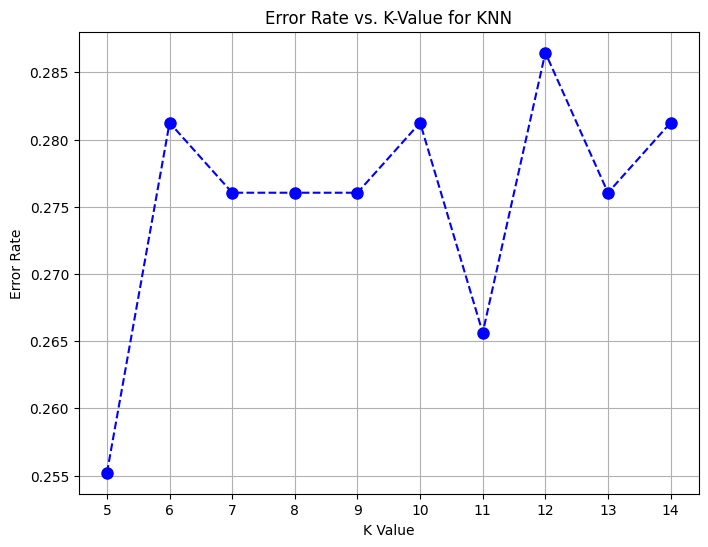

In [ ]:
# Plot Error Rate vs. K-values

# Define a range of K values to test
k_values = range(5, 15)
error_rates = []

# Iterate through different K values to find the best one
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")  # Use Euclidean Distance
    knn.fit(X_train, y_train)  # Train KNN model
    y_pred_k = knn.predict(X_test)  # Predict on test set
    error = 1 - accuracy_score(y_test, y_pred_k)  # Calculate error rate
    error_rates.append(error)

# Plot the Error Rate vs. K-value Graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='blue', markersize=8)
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Error Rate vs. K-Value for KNN")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Report on K-Nearest Neighbors (KNN) Classification
a. KNN Overview & Importance of Scaling:
K-Nearest Neighbors (KNN) is a simple algorithm that classifies data points based on their nearest neighbors. Since it relies on distance calculations, scaling is important to ensure that all features contribute equally. Without scaling, features with large values (e.g., glucose levels) dominate smaller ones (e.g., BMI), leading to biased predictions.


b. Top 3 Features & Alternatives:
The top 3 selected features were Glucose, BMI, and Age, as they strongly influence diabetes risk. Glucose is directly linked to blood sugar levels, BMI represents body weight, and Age increases risk over time. Alternative features include Insulin, DiabetesPedigreeFunction, and BloodPressure, which also show significant correlations with diabetes.

Visualization of Target Variable with Top 3 Features:

A scatter plot of Glucose vs. BMI, colored by Outcome, shows that higher glucose levels and BMI values correspond to a higher risk of diabetes.

A scatter plot of Age vs. Glucose demonstrates that older individuals with high glucose levels have a greater likelihood of being diabetic.

A scatter plot of BMI vs. Age reveals that younger individuals with lower BMI values have a lower risk of diabetes.

c. Pearson's Correlation & Observations:
Pearson’s Correlation measures the strength of the relationship between variables. The heatmap showed Glucose had the highest correlation with diabetes, meaning higher glucose levels are linked to a higher risk. BMI and DiabetesPedigreeFunction also showed moderate correlations, making them important predictors.

d. Model Performance & Comparison:
The Elbow Method was used to determine the best K value, ensuring optimal performance. The Confusion Matrix and Classification Report showed how well the model classified diabetic and non-diabetic individuals. The ROC Curve confirmed strong predictive power. Scaling and selecting relevant features improved accuracy, making the KNN model more effective in predicting diabetes.